In [93]:
import torch
import math
import matplotlib.pyplot as plt

batch_size = 1000
block_size = 256
topK = 5
logits_distribution = ["uniform", "gaussian"][1]
logits_std = 10.0
ar_attenuation = 1.0
factor_est = ["mean", "max"][1]

In [105]:
def f(logits_std, ar_attenuation, logits_distribution, factor_est="mean"):
    if logits_distribution == "gaussian":
        logits = torch.randn((batch_size, block_size)) * logits_std
    elif logits_distribution == "uniform":
        uniform_range = math.sqrt(12) * logits_std
        logits = torch.rand((batch_size, block_size)) * uniform_range - uniform_range/2.
    p = torch.softmax(logits, dim=-1)
    p = torch.topk(p, k = topK, dim=-1)[0][:,0]
    att_scales = 1.0 / p
    att_scales_normalized = 1.0 + (att_scales - 1.0) / ar_attenuation
    if factor_est == "mean":
        return att_scales_normalized.mean()
    elif factor_est == "max":        
        return att_scales_normalized.max()

def g(logits_std, target_factor, logits_distribution, factor_est="max"):
    if logits_distribution == "gaussian":
        logits = torch.randn((batch_size, block_size)) * logits_std
    elif logits_distribution == "uniform":
        uniform_range = math.sqrt(12) * logits_std
        logits = torch.rand((batch_size, block_size)) * uniform_range - uniform_range/2.
    p = torch.softmax(logits, dim=-1)
    p = torch.topk(p, k = topK, dim=-1)[0][:,0]
    att_scales = 1.0 / p
    if factor_est == "mean":
        return (att_scales.mean() - 1.0) / (target_factor - 1.0)        
    elif factor_est == "max":   
        return (att_scales.max() - 1.0) / (target_factor - 1.0)     


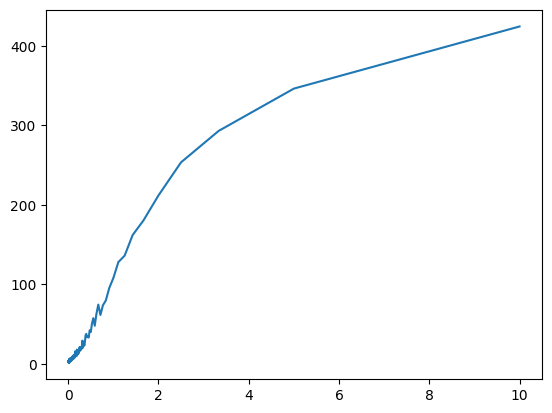

In [118]:
logits_std_values =  torch.arange(0,100,0.1) #torch.exp(torch.arange(0,2,0.01))
target_factor = 1.5
ar_attenuation_values = [g(v, target_factor, logits_distribution) for v in logits_std_values]
plt.plot(1.0/logits_std_values, torch.tensor(ar_attenuation_values))

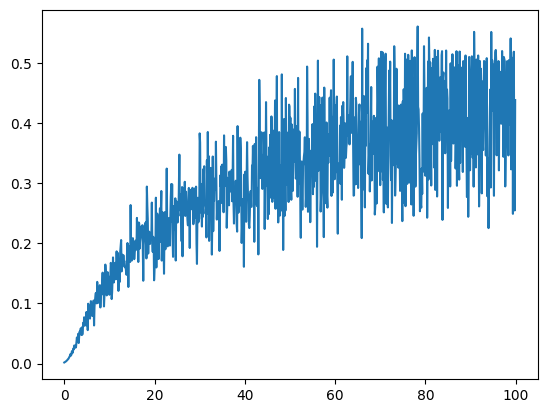

In [119]:
plt.plot(logits_std_values, 1.0/torch.tensor(ar_attenuation_values))

In [120]:
y = a * 1/x + b
x = a / (y - b) = a/y / (1 - b/y) = a*t / (1 - b*t)

SyntaxError: cannot assign to expression (1021414836.py, line 2)

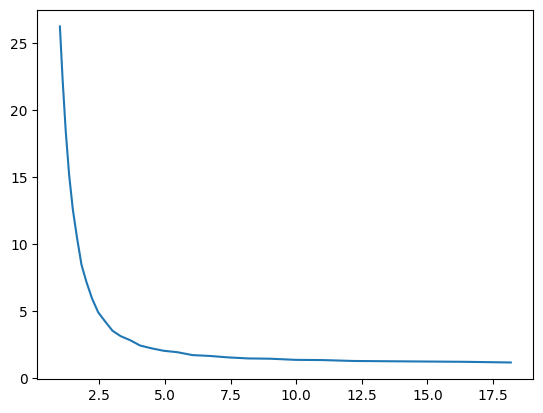

In [108]:
logits_std_values = torch.exp(torch.arange(0,3,0.1))
factor_max_values = [f(v, ar_attenuation, logits_distribution) for v in logits_std_values]
plt.plot(logits_std_values, factor_max_values)

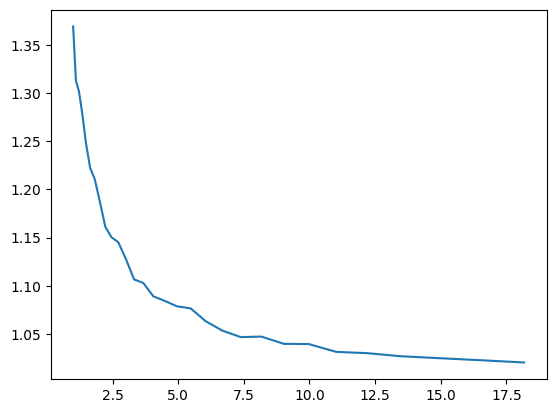

In [103]:
ar_attenuation_values = torch.exp(torch.arange(0,3,0.1))
factor_max_values = [f(logits_std, v, logits_distribution) for v in ar_attenuation_values]
plt.plot(ar_attenuation_values, factor_max_values)

In [82]:
att_scales_normalized.mean(), att_scales_normalized.max()

(tensor(1.0378), tensor(1.3691))